# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [59]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [61]:
def model_function(str):
    if str == 'PCA':
        return PCA()
    else:
        return LinearRegression()

In [62]:
import pandas as pd

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [63]:
pca = model_function('PCA')  # Specify the number of components you want to keep
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [64]:
lr = model_function('LinearRegression')
lr.fit(X_train_pca, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test_pca)

In [66]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

In [67]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
df_tsne['target'] = y_train.values

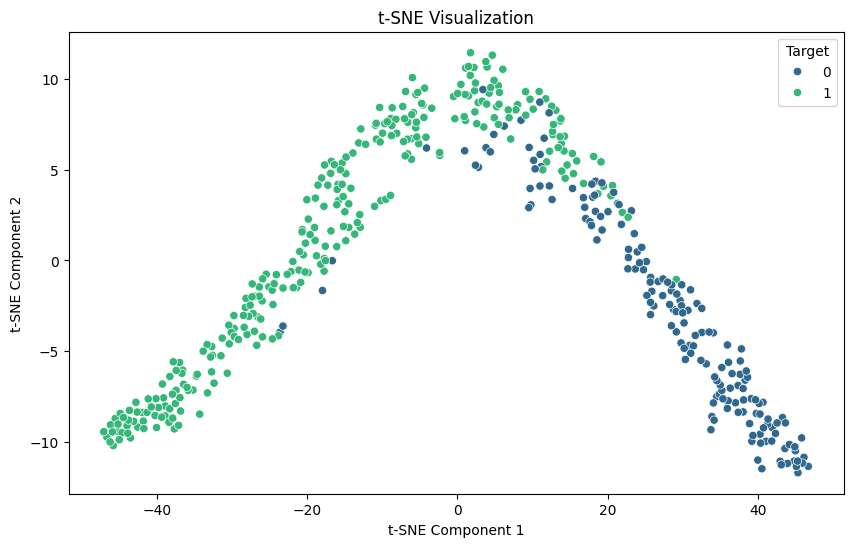

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='target', data=df_tsne, palette='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Target')
plt.show()